#Phase 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
item_name = "Winter Offensive Weapon Case" #@param ["Horizon case", "Spectrum 2 Case", "Operation Hydra Case", "Spectrum Case", "Glove Case", "Gamma 2 Case", "Gamma Case", "Chroma 3 Case", "Operation Wildfire Case", "Revolver Case", "Shadow Case", "Falchion Case", "Chroma 2 Case", "Chroma Case", "Operation Vanguard Weapon Case", "Operation Breakout Weapon Case", "Huntsman Weapon Case", "Operation Phoenix Weapon Case", "Winter Offensive Weapon Case", "Prisma 2 Case", "Chicken Capsule", "Prisma Case", "Danger Zone Case", "Sticker Capsule 2", "Sticker Capsule", "Snakebite Case", "Operation Broken Fang Case", "Fracture Case", "Shattered Web Case", "Clutch Case"]

In [ ]:
name='/content/drive/MyDrive/College_Project/Steam_scrapper/Database_of_items_price/'+item_name+'.csv'
item=pd.read_csv(name)

In [ ]:
item.tail(3)

,Date,Price,Quantity Sold
3587,Nov 09 2021 10: +0,2.835,6
3588,Nov 09 2021 11: +0,2.892,4
3589,Nov 09 2021 12: +0,2.909,5


##Data Preprocessing

In [ ]:
## function to filter only date from the string and return 
def filterdate(s):
  s=s.split()
  date_str=' '.join([s[0],s[1],s[2]])
  return datetime.strptime(date_str, '%b %d %Y').date()


In [ ]:
item['Date'] = item['Date'].apply(filterdate)
item.tail()

,Date,Price,Quantity Sold
3585,2021-11-09,2.900,3
3586,2021-11-09,2.858,6
3587,2021-11-09,2.835,6
3588,2021-11-09,2.892,4
3589,2021-11-09,2.909,5


In [ ]:
print(item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3590 non-null   object 
 1   Price          3590 non-null   float64
 2   Quantity Sold  3590 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 84.3+ KB
None


In [ ]:
group=item.groupby('Date')
mdf=group.mean()
mdf.tail()

,Price,Quantity Sold
Date,,
2021-11-05,3.607125,9.875000
2021-11-06,3.681667,11.750000
2021-11-07,3.394250,12.166667
2021-11-08,3.273125,11.958333
2021-11-09,2.970846,4.923077


In [ ]:
item.describe()

,Price,Quantity Sold
count,3590.000000,3590.000000
mean,1.963699,3618.611978
std,1.280059,9122.982605
min,0.053000,1.000000
25%,0.958000,225.000000
50%,1.522000,391.000000
75%,3.195000,898.000000
max,7.084000,65889.000000


In [ ]:
bool_series = pd.isnull(item['Price'])
print(item[bool_series])
bool_series=pd.isnull(item['Quantity Sold'])
print(item[bool_series])
bool_series=pd.isnull(item['Date'])
print(item[bool_series])
#checking null values in the dataset, there is no null value

Empty DataFrame
Columns: [Date, Price, Quantity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quantity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quantity Sold]
Index: []


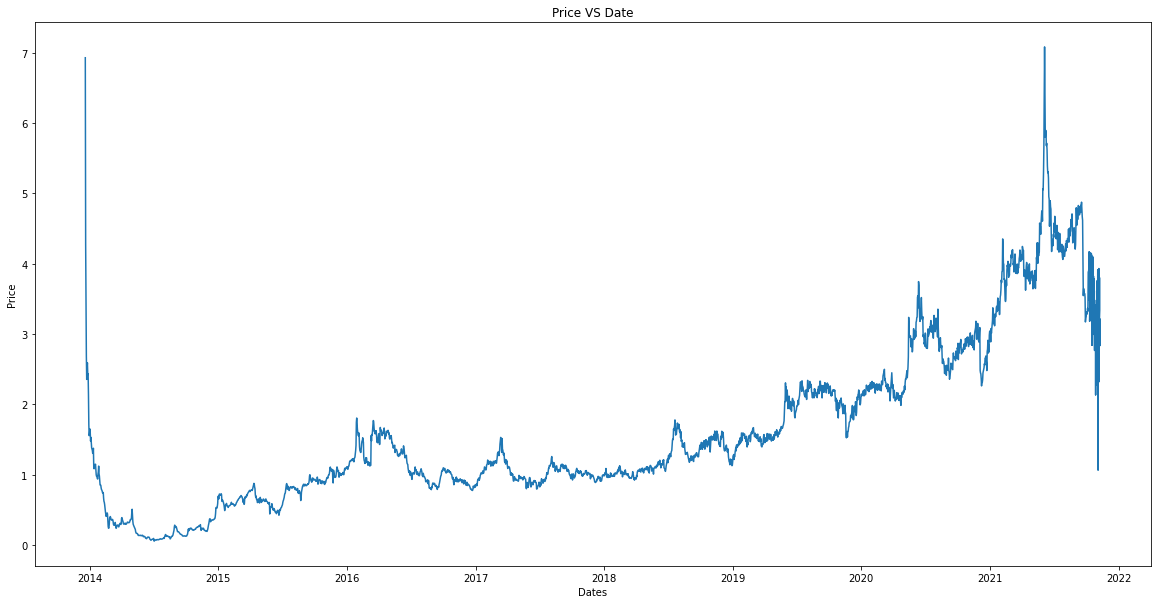

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Price VS Date')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(item['Date'], item['Price'])
plt.show()

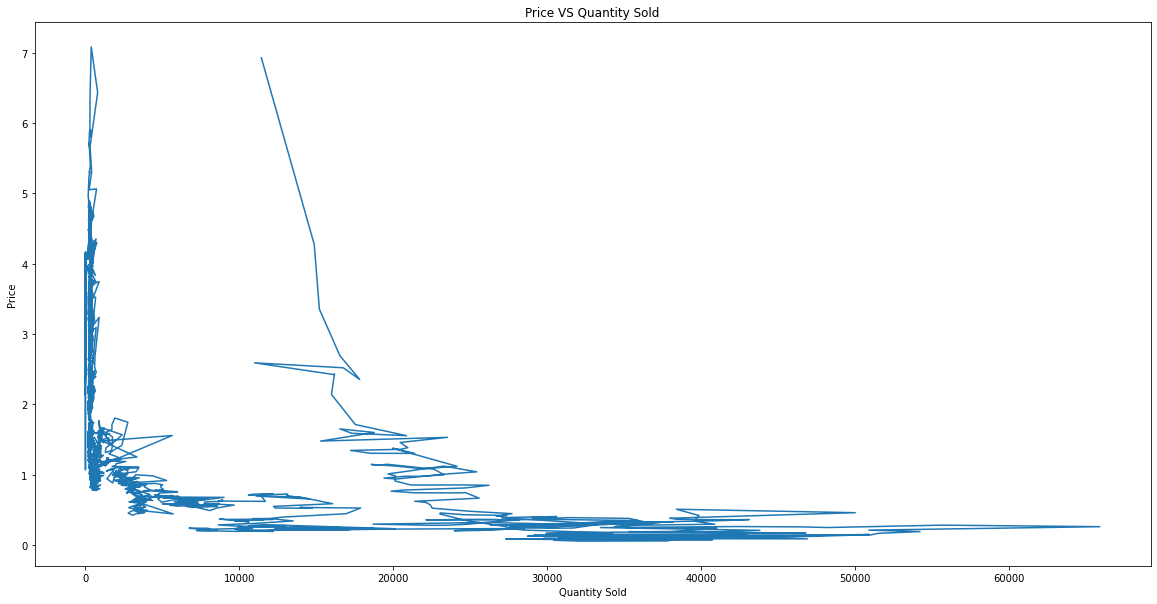

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Price VS Quantity Sold')
plt.ylabel('Price')
plt.xlabel('Quantity Sold')
plt.plot(item['Quantity Sold'],item['Price'])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98b6f42410>,
      dtype=object)

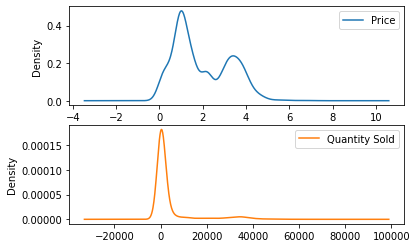

In [ ]:
#Density plots
item[['Price', 'Quantity Sold']].plot(kind='density', subplots=True, sharex=False)


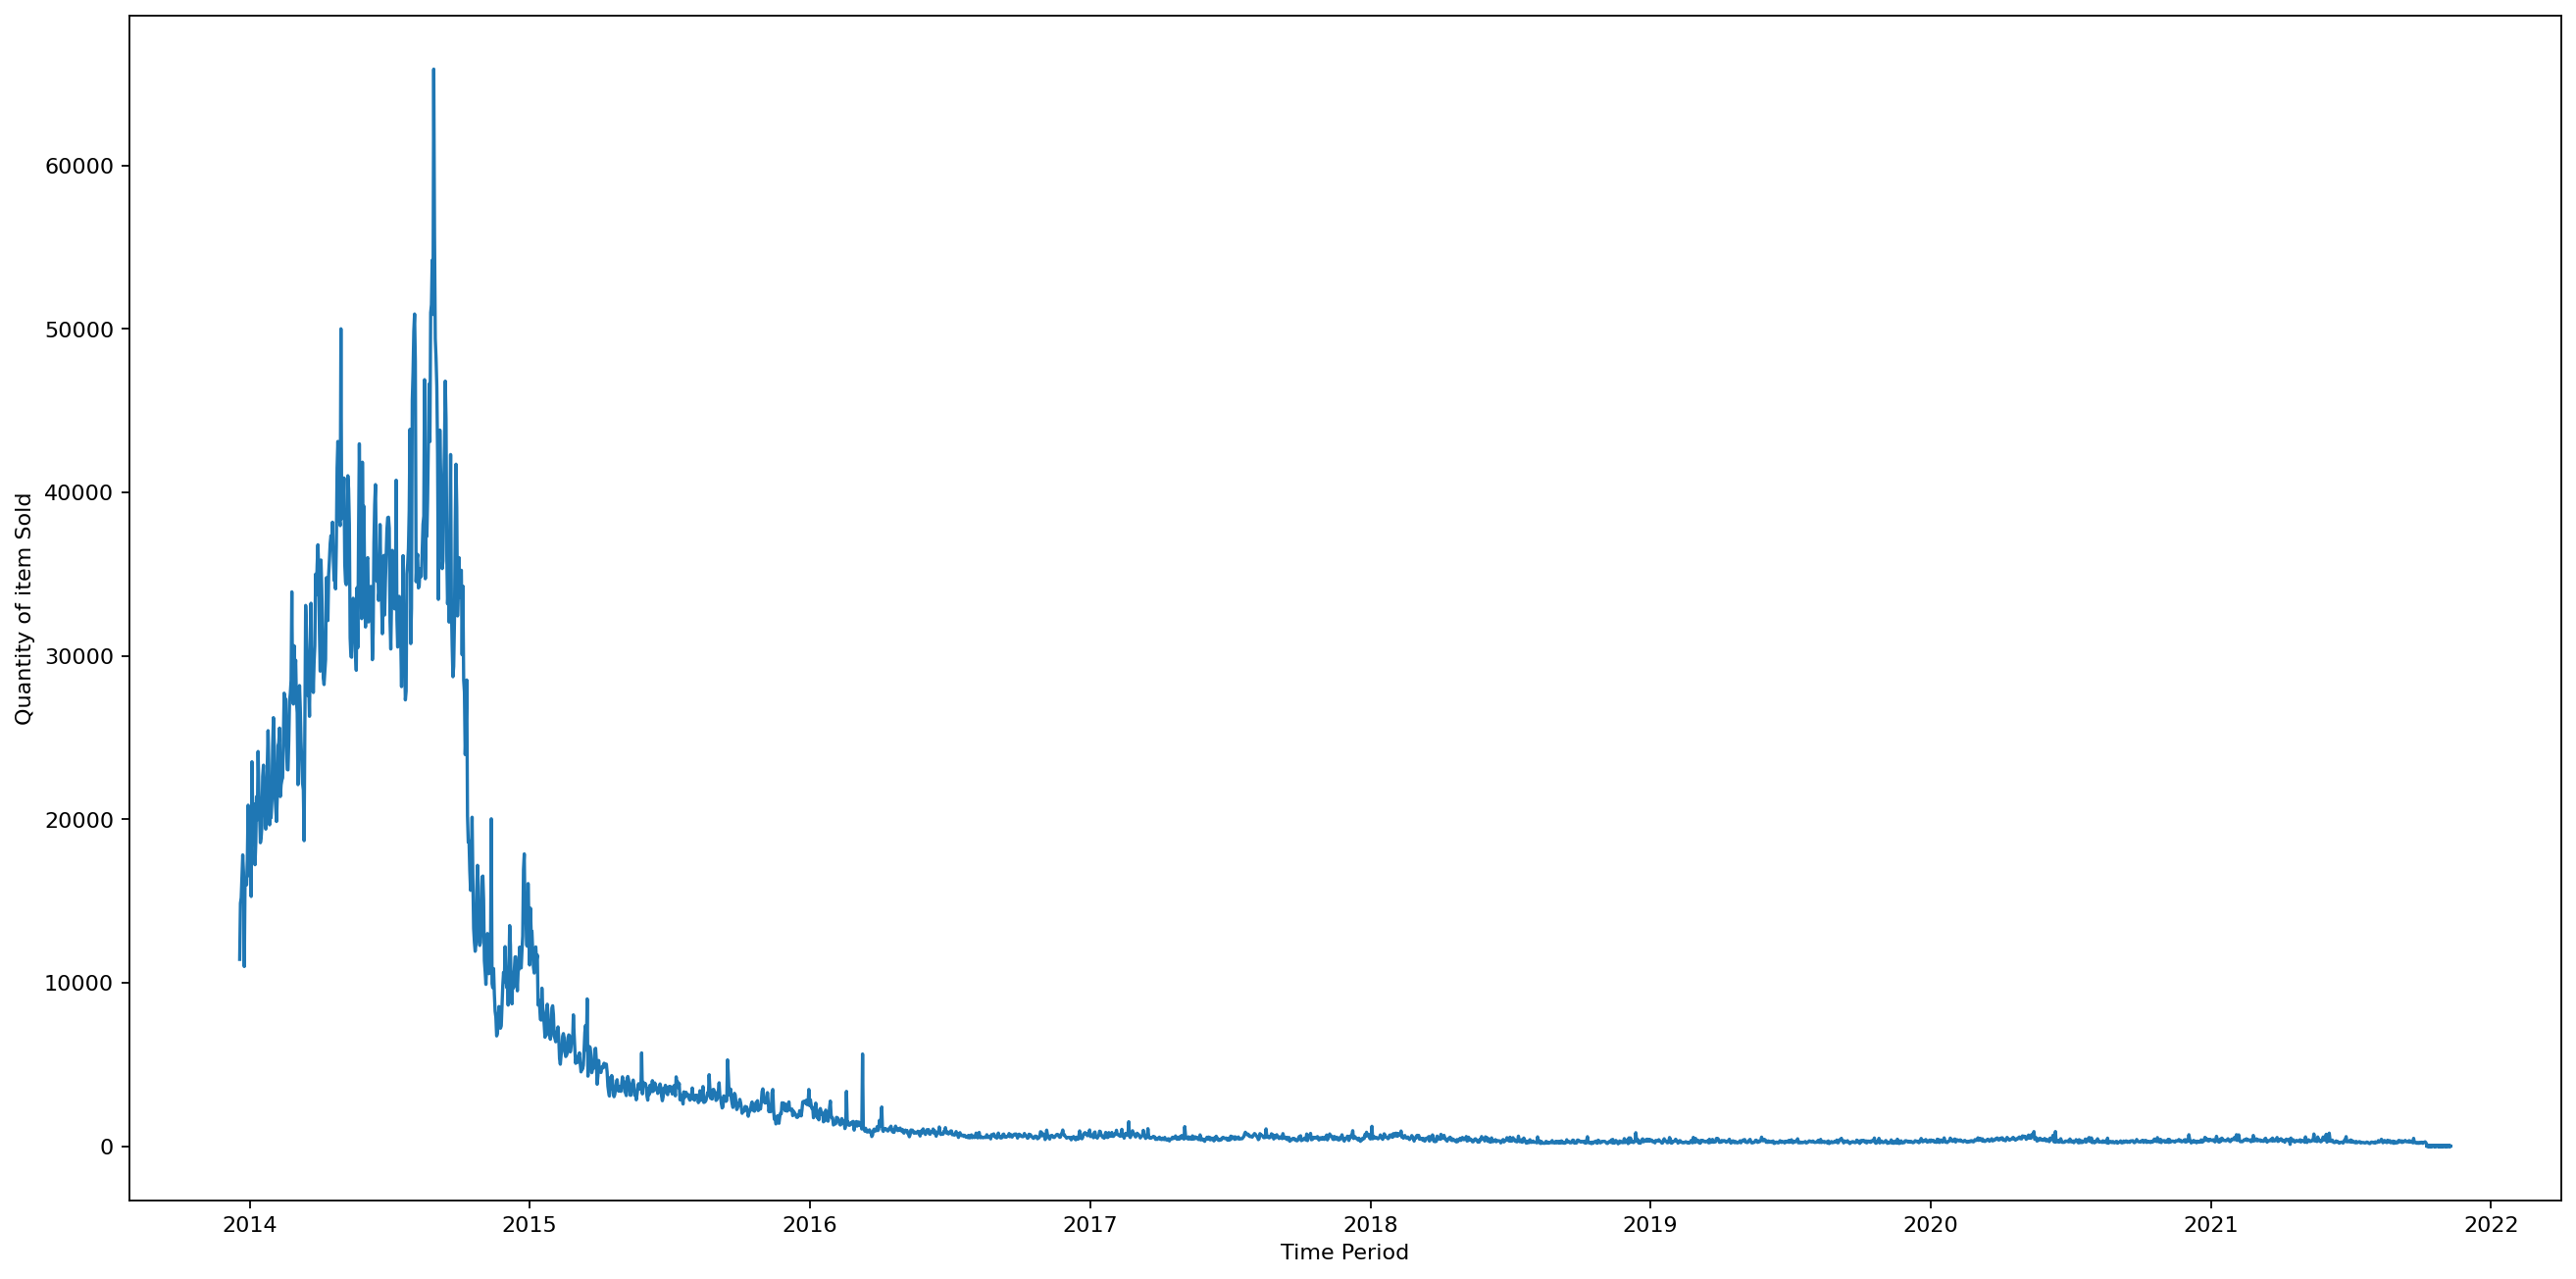

In [ ]:
plt.figure(figsize=(20,10), dpi=160)
plt.xlabel('Time Period')
plt.ylabel('Quantity of item Sold')
plt.plot(item['Date'], item['Quantity Sold'])
plt.show()

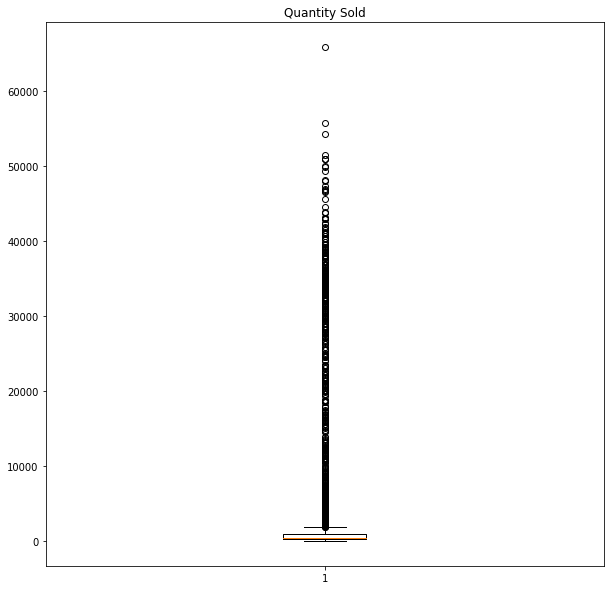

In [ ]:
#box whisker's plot
#item.plot(kind='box', subplots=True, sharex=False, sharey=False)
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(item['Quantity Sold'])
ax.set_title('Quantity Sold')
plt.show()
#ax.boxplot(item['Price'])
#plt.show()

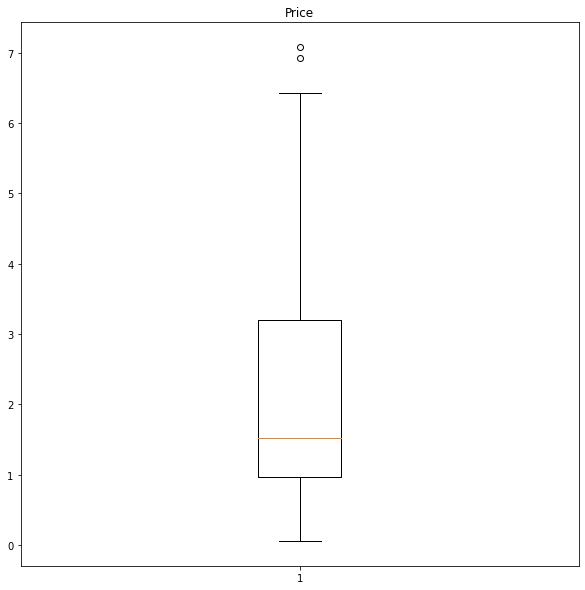

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Price')
ax.boxplot(item['Price'])
plt.show()

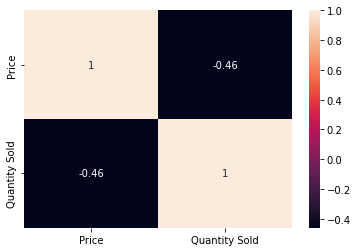

In [ ]:
#corr matrix
cm=item.corr()
sns.heatmap(cm, annot=True)

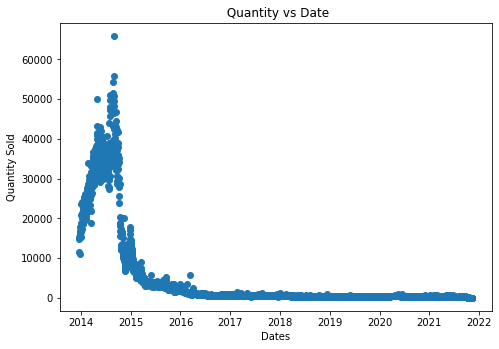

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(item['Date'], item['Quantity Sold'])
ax.set_xlabel('Dates')
ax.set_ylabel('Quantity Sold')
ax.set_title(' Quantity vs Date')
plt.show()

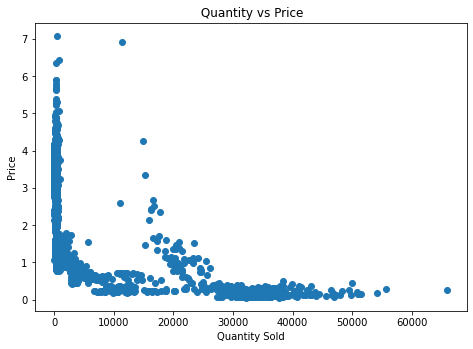

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter( item['Quantity Sold'], item['Price'],)
ax.set_xlabel('Quantity Sold')
ax.set_ylabel('Price')
ax.set_title(' Quantity vs Price')
plt.show()

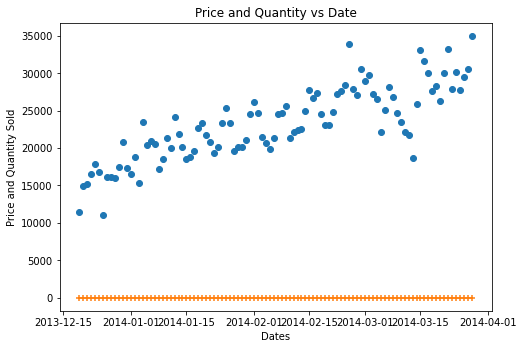

In [ ]:
#scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(item['Date'][:100], item['Quantity Sold'][:100])
ax.scatter(item['Date'][:100], item['Price'][:100], marker='+')
ax.set_xlabel('Dates')
ax.set_ylabel('Price and Quantity Sold')
ax.set_title('Price and Quantity vs Date')
plt.show()

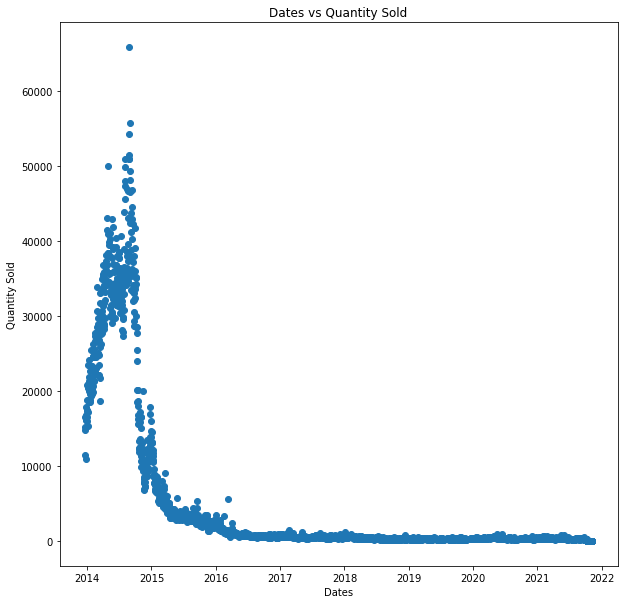

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Dates')
plt.ylabel('Quantity Sold')
plt.title('Dates vs Quantity Sold')
plt.scatter(item['Date'],item['Quantity Sold'])
plt.show()

## Converting Dates into numerical data

In [ ]:
item['Date'] = item['Date'].apply(lambda x :x.toordinal())
item.tail()

,Date,Price,Quantity Sold
3585,738103,2.900,3
3586,738103,2.858,6
3587,738103,2.835,6
3588,738103,2.892,4
3589,738103,2.909,5


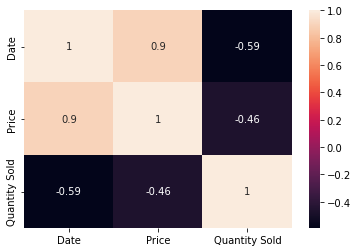

In [ ]:
#corr matrix
cm=item.corr()
sns.heatmap(cm, annot=True)

##Normalization

In [ ]:
from sklearn import preprocessing
x = preprocessing.normalize([item['Date']])

x=x.T

y=preprocessing.normalize([item['Price']])
y=y.T

##Fitting according to the dates and the prices
###Splitting of dataset

In [ ]:
X=item[['Date']]
y=item['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Models

##Model 1 using price and date as y and x 

In [ ]:
reg1=linear_model.LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg1.predict([[datetime.strptime("2016-01-01", "%Y-%m-%d").toordinal()]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.75439263])

In [ ]:
reg1.coef_

array([0.00123324])

In [ ]:
reg1.intercept_

-906.8681593667051

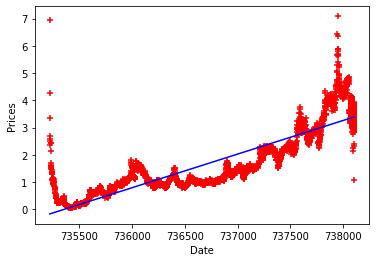

In [ ]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, reg1.predict(item[['Date']]), color='blue')

###Accuracy

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
test_pred = reg1.predict(X_test)
train_pred = reg1.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4109775378332115
MSE: 0.3099796504472674
RMSE: 0.5567581615452686
R2 Square 0.8048305154795752
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.42007695386549276
MSE: 0.31821431134433253
RMSE: 0.5641048761926567
R2 Square 0.8082151890527902
__________________________________


##Finding opti parameters function for further models

In [ ]:
def findOptiPara(trainX, trainY, testX, testY):
  for i in range(1,10):
    poly = PolynomialFeatures(degree=i, include_bias=True)
    x_train_trans = poly.fit_transform(trainX)
    x_test_trans = poly.transform(testX)
    lr = LinearRegression()
    lr.fit(x_train_trans, trainY)
    y_pred = lr.predict(x_test_trans)
    print("degree="+ str(i) +" r2 score="+str(metrics.r2_score(y_test, y_pred)))
    ##Plot graph
    x = poly.transform(X)
    lr = LinearRegression()
    lr.fit(x, y)
    z=lr.predict(x)
    plt.figure(i)
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.scatter(item.Date, item.Price, color='red', marker='+') 
    plt.plot(item.Date, z, color='blue')



##Model 2 using quantity sold(x) and price(y)

In [ ]:
X=item[['Quantity Sold']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=1, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

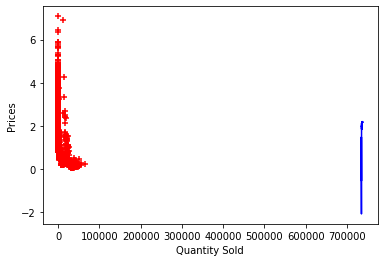

In [ ]:
x_test_trans = poly.transform(X)
z=lr.predict(x_test_trans)
plt.xlabel('Quantity Sold')
plt.ylabel('Prices')
plt.scatter(item['Quantity Sold'], item.Price, color='red', marker='+')
plt.plot(item.Date, z, color='blue')

In [ ]:
findOptiPara(x_train, y_train, x_test, y_test)

hence we cannot select quantity sold as a feature to determine the price as best accuracy is only 38% approx.

##Model 3 Using polynomial regression using one variable (date)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X=item[['Date']]
y=item['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

In [ ]:
x_test_trans = poly.transform(X)
z=lr.predict(x_test_trans)

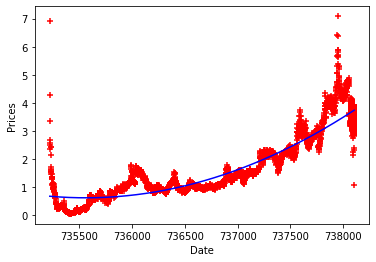

In [ ]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, z, color='blue')

##Finding optimal degree for regression

In [ ]:
findOptiPara(x_train, y_train, x_test, y_test)

#### Accuracy is almost constant for degree>=2. Hence we need take 2 here.

###Accuracy of selected model

In [ ]:
x_test_trans=poly.fit_transform(x_test)
x_train_trans=poly.fit_transform(x_train)
test_pred = lr.predict(x_test_trans)
train_pred = lr.predict(x_train_trans)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3236910443691424
MSE: 0.1942975532832026
RMSE: 0.4407919614548371
R2 Square 0.879633246830265
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.32507506891041377
MSE: 0.20978526541838494
RMSE: 0.4580232149338993
R2 Square 0.8723969207406409
__________________________________


## function to predict the price of the item from our model

In [ ]:
#@title Default title text
Enter_date = "2021-11-21" #@param {type:"date"}
date=list(map(int, Enter_date.split('-')))
date=dt.date(year=date[0], month=date[1], day=date[2])
date=date.toordinal()

###predicting on model 1 linear regression using only date and price as x and y attributes

In [ ]:
def prediction1(date):
  return reg1.predict([[date]])
print(prediction1(date))

[3.40261891]


###predicting on model 2 polynomial regression model 

In [ ]:
def prediction2(date):
  return lr.predict(poly.transform([[date]]))
print(prediction2(date))

[3.77072767]


#Phase 2